# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
#!pip install citipy

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api
from config import gkey
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['juneau',
 'georgetown',
 'provideniya',
 'thompson',
 'atuona',
 'bonavista',
 'touros',
 'busselton',
 'vila velha',
 'kapaa',
 'nacala',
 'bluff',
 'cockburn harbour',
 'rikitea',
 'longyearbyen',
 'port alfred',
 'palabuhanratu',
 'namibe',
 'punta arenas',
 'henties bay',
 'yellowknife',
 'attawapiskat',
 'san andres',
 'puerto escondido',
 'mount gambier',
 'popondetta',
 'mataura',
 'prieska',
 'tuktoyaktuk',
 'chagda',
 'nikolskoye',
 'bredasdorp',
 'road town',
 'avarua',
 'portland',
 'les cayes',
 'jamestown',
 'belushya guba',
 'yima',
 'tessalit',
 'castro',
 'butaritari',
 'sao filipe',
 'kavieng',
 'kieta',
 'ashtian',
 'jacareacanga',
 'bilibino',
 'mys shmidta',
 'follonica',
 'honiara',
 'alofi',
 'la primavera',
 'alexandria',
 'hobart',
 'jiutepec',
 'puerto ayora',
 'dikson',
 'albany',
 'mayo',
 'lebu',
 'mnogovershinnyy',
 'torbay',
 'diamantino',
 'victoria',
 'saint anthony',
 'tumannyy',
 'cockburn town',
 'komsomolskiy',
 'bengkulu',
 'aklavik',
 'sistranda'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
lat = []
Lng = []
Max_Temp = []
Humidity = []
Wind_Speed = []
Country = []
Date = []
ID = []
Cloudiness = []

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
weather_api = '689b7b3dd8c7bf39b9b38619b95f705a'
query_url = f"{url}appid={weather_api}&units={units}&q="
#try:
 #   query_url
#except:
  #  print("This key does not Exist")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=689b7b3dd8c7bf39b9b38619b95f705a&units=metric&q='

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api}&units={units}&q="
for City in cities:
    
    try:
        response = requests.get(query_url + City).json()
    except Exception as e:
        print(e)
    
    if(response['cod']=='400'):
        print(f'Error with: {City}')
    else:
        try:
            lat.append(response['coord']['lat'])
        except:
            print('Error')
        try:
            Lng.append(response['coord']['lon'])
        except:
            print('Error')
        try:
            Max_Temp.append(response['main']['temp_max'])
        except:
            print('Error')
        try:
            Humidity.append(response['main']['humidity'])
        except:
            print('Error')
        try:
            Country.append(response['sys']['country'])
        except:
            print('Error')
        try:
            Date.append(response['dt'])
        except:
            print('Error')
        try:
            Wind_Speed.append(response['wind']['speed'])
        except:
            print('Error')
        try:
            ID.append(response['id'])
        except:
            print('Error')
        try:
            Cloudiness.append(response['clouds']['all'])
        except:
            print('Error')
        try:
            print(response['name'] + " " + "has the city id of" + " " + str(response['id']) + '.')  
        except:
            print("Error")

Juneau has the city id of 5554072.
George Town has the city id of 1735106.
Provideniya has the city id of 4031574.
Thompson has the city id of 6165406.
Atuona has the city id of 4020109.
Bonavista has the city id of 5905393.
Touros has the city id of 3386213.
Busselton has the city id of 2075265.
Vila Velha has the city id of 3445026.
Kapaa has the city id of 5848280.
Nacala has the city id of 1035025.
Bluff has the city id of 2206939.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Rikitea has the city id of 4030556.
Longyearbyen has the city id of 2729907.
Port Alfred has the city id of 964432.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Mossamedes has the city id of 3347019.
Punta Arenas has the city id of 3874787.
Henties Bay has the city id of 3356832.
Yellowknife has the city id of 6185377.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
San Andrés has the city id of 3670218.
Puerto Escondido has the city id of 3520994.
Mount Gambier has th

Hanyang has the city id of 1798537.
Pevek has the city id of 2122090.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Dzilam González has the city id of 3529654.
Petropavlovsk-Kamchatskiy has the city id of 2122104.
Andenes has the city id of 3163146.
Malakal has the city id of 370737.
Mezen' has the city id of 527321.
Binabalian Ricor has the city id of 1725210.
Inhambane has the city id of 1045114.
Kirakira has the city id of 2178753.
Viedma has the city id of 3832899.
Bulungu has the city id of 2316259.
Meïganga has the city id of 2227402.
Dicabisagan has the city id of 1715015.
Kurmanayevka has the city id of 538685.
Vestmannaeyjar has the city id of 3412093.
Innisfail has the city id of 2162683.
Vao has the city id of 2137773.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Orán has the city id of 3836620.
Bārmer has the city id of 1276901.
Wanaka has the city id of 2184707.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Angoram has the city id

Bam has the city id of 141736.
Khasan has the city id of 2039557.
Pucallpa has the city id of 3693345.
Villacarrillo has the city id of 2509606.
Zaysan has the city id of 1517060.
Strezhevoy has the city id of 1490796.
Departamento de Maldonado has the city id of 3441890.
Polovinnoye has the city id of 1494523.
Alberdi has the city id of 3866418.
Mayumba has the city id of 2399001.
Makushino has the city id of 1500036.
Middelburg has the city id of 976361.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Sept-Îles has the city id of 6144312.
Sühbaatar has the city id of 2029156.
Dakar has the city id of 2253354.
Kerema has the city id of 2094144.
East London has the city id of 1006984.
Kloulklubed has the city id of 7671223.
Pangnirtung has the city id of 6096551.
Maamba has the city id of 908718.
Ghātanji has the city id of 1271343.
Thai Binh has the city id of 1566346.
Killybegs has the city id of 2963295.
Error
E

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
Cities = cities[:544]
weather_dict = {
    "City": Cities,
    "Latitude": lat,
    "Longitude": Lng,
    "Max Temp":Max_Temp,
    "Humidity":Humidity,
    "Wind Speed":Wind_Speed,
    "Country":Country, 
    'Cloudiness':Cloudiness,
    "Date":Date}
weather_dict = pd.DataFrame(weather_dict)

In [21]:
weather_dict

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Cloudiness,Date
0,juneau,58.30,-134.42,11.00,62,3.60,US,90,1589828520
1,georgetown,5.41,100.34,28.00,94,1.00,MY,20,1589828665
2,provideniya,64.38,-173.30,3.70,71,7.63,RU,100,1589828692
3,thompson,55.74,-97.86,16.00,51,5.70,CA,75,1589828434
4,atuona,-9.80,-139.03,27.25,69,5.15,PF,0,1589828692
...,...,...,...,...,...,...,...,...,...
539,kahului,66.00,111.50,6.00,52,1.00,RU,100,1589828730
540,bolgatanga,35.51,27.21,25.00,73,1.00,GR,0,1589828583
541,marcona,-29.68,-53.81,25.00,53,4.60,BR,0,1589828731
542,lang son,47.80,67.71,11.26,81,5.85,KZ,17,1589828731


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
Humidity_DF = weather_dict.loc[weather_dict['Humidity'] > 100, :]
Humidity_DF
print("There are no cities that have a humidity that is greater than 100%.")

There are no cities that have a humidity that is greater than 100%.


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

As the latitude increases, the max temperature decreases.


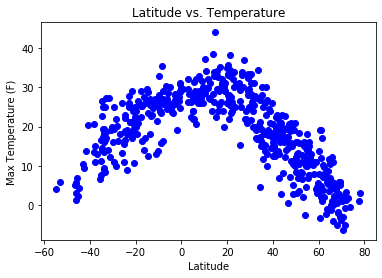

In [23]:
x_axis = lat
y_axis = Max_Temp
Lat_Temperature = plt.scatter(x_axis, y_axis, marker='o', color='blue')
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print('As the latitude increases, the max temperature decreases.')
#plt.savefig('Output/Latitude vs. TempPlot.png')

## Latitude vs. Humidity Plot

There is no discernable pattern between Latitude and Humidity Percentage.


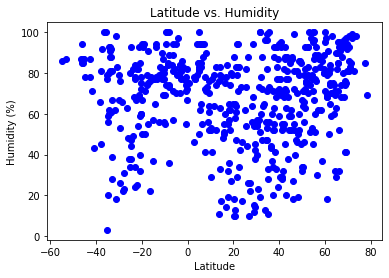

In [83]:
x_axis = lat
y_axis = Humidity
plt.scatter(x_axis, y_axis, marker='o', color='blue')
Lat_Humidity = plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print('There is no discernable pattern between Latitude and Humidity Percentage.')
#plt.savefig('Output/Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

There is no discernable pattern between Latitude and Cloudiness.


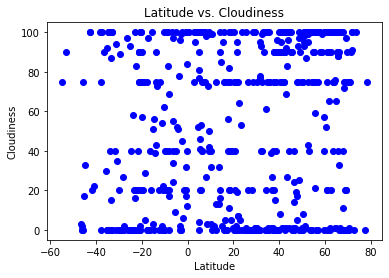

In [25]:
x_axis = lat
y_axis = Cloudiness
plt.scatter(x_axis, y_axis, marker='o', color='blue')
Lat_Humidity = plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print('There is no discernable pattern between Latitude and Cloudiness.')
plt.savefig('Output/Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

There is a clear outlier that needs to be removed in order to remove bias.


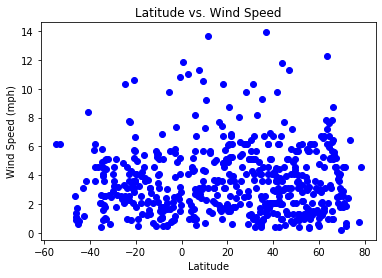

In [26]:
x_axis = lat
y_axis = Wind_Speed
plt.scatter(x_axis, y_axis, marker='o', color='blue')
Lat_Humidity = plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print('There is a clear outlier that needs to be removed in order to remove bias.')
plt.savefig('Output/Latitude vs. Wind Speed.png')

## Linear Regression

In [71]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear(x, y):
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

In [64]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_dict.loc[weather_dict['Latitude'] >= 0, :]
Southern_Hemisphere = weather_dict.loc[weather_dict['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

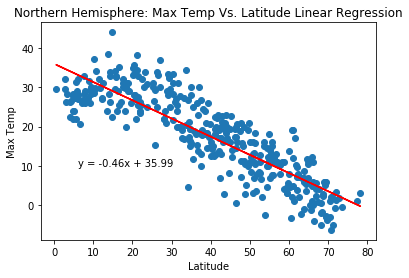

There is a negative relationship between the max temperature and the latitude of a city in the northern hemisphere.
 As the latitude increases, the max temperature tends to decrease.


In [61]:
x_axis = Northern_Hemisphere['Latitude']
y_axis = Northern_Hemisphere['Max Temp']
Linear(x_axis, y_axis)
plt.annotate(Equation,(6,10),fontsize=10,color="black")
plt.title('Northern Hemisphere: Max Temp Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print("There is a negative relationship between the max temperature and the latitude of a city in the northern hemisphere.\n As the latitude increases, the max temperature tends to decrease.")
#plt.savefig('Output/Northern Hemisphere Latitude vs. Max Temp Linear.png')

In [53]:
y_axis

4      27.25
6      30.00
7       9.44
8      25.00
10     23.34
       ...  
522    25.88
523    27.27
524    21.87
532    24.77
541    25.00
Name: Max Temp, Length: 172, dtype: float64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

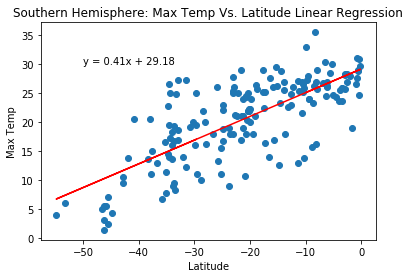

As the Latitude increases, the maximum temperature in a city increases.


In [72]:
x_axis = Southern_Hemisphere['Latitude']
y_axis = Southern_Hemisphere['Max Temp']
Linear(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(Equation,(-50,30),fontsize=10,color="black")
plt.title('Southern Hemisphere: Max Temp Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print('As the Latitude increases, the maximum temperature in a city increases.')
#plt.savefig('Output/Southern Hemisphere Latitude vs. Max Temp Linear.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

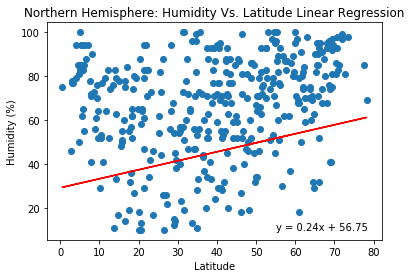

As the latitude increases, the humidity naturally increases.


<Figure size 432x288 with 0 Axes>

In [67]:
x_axis = Northern_Hemisphere['Latitude']
y_axis = Northern_Hemisphere['Humidity']
Linear(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(Equation,(55,10),fontsize=10,color="black")
plt.title('Northern Hemisphere: Humidity Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print("As the latitude increases, the humidity naturally increases.")
plt.savefig('Output/Northern Hemisphere Latitude vs. Humidity Linear.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

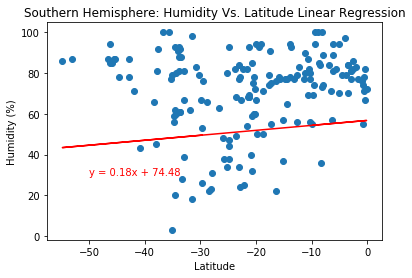

I would like to check for any outliers to see if accuracy for future predictions can be better.


<Figure size 432x288 with 0 Axes>

In [68]:
x_axis = Southern_Hemisphere['Latitude']
y_axis = Southern_Hemisphere['Humidity']
Linear(x_axis, y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(Equation,(-50,30),fontsize=10,color="red")
plt.title('Southern Hemisphere: Humidity Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print('I would like to check for any outliers to see if accuracy for future predictions can be better.')
plt.savefig('Output/Southern Hemisphere Latitude vs. Humidity Linear.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

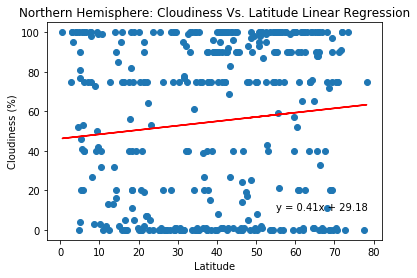

Even though there is a positive trend, the wide variance appears to have made the accuracy of predcitions questionable.


<Figure size 432x288 with 0 Axes>

In [74]:
x_axis = Northern_Hemisphere['Latitude']
y_axis = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(Equation,(55,10),fontsize=10,color="black")
plt.title('Northern Hemisphere: Cloudiness Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print('Even though there is a positive trend, the wide variance appears to have made the accuracy of predcitions questionable.')
plt.savefig('Output/Northern Hemisphere Latitude vs. Cloudiness Linear.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

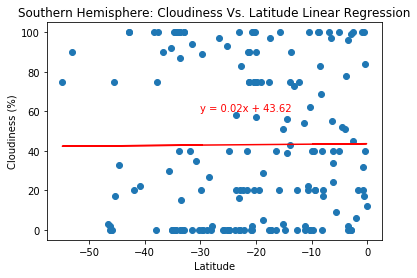

There is a wide variety of numbers. Therefore, the reliability of the data is in question.


<Figure size 432x288 with 0 Axes>

In [75]:
x_axis = Southern_Hemisphere['Latitude']
y_axis = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=10,color="red")
plt.title('Southern Hemisphere: Cloudiness Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print('There is a wide variety of numbers. Therefore, the reliability of the data is in question.')
plt.savefig('Output/Southern Hemisphere Latitude vs. Cloudiness Linear.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_axis = Northern_Hemisphere['Latitude']
y_axis = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(55,100),fontsize=10,color="black")
plt.title('Northern Hemisphere: Wind Speed Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print('There is a anamoly that would otherwise bias the data.')
plt.savefig('Output/Northern Hemisphere Latitude vs. Wind Speed Linear.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

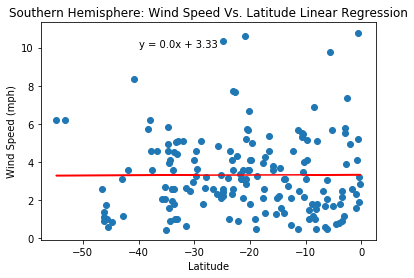

I would like to remove the anamolies to seee if there is a better fitted model.


<Figure size 432x288 with 0 Axes>

In [76]:
x_axis = Southern_Hemisphere['Latitude']
y_axis = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=10,color="black")
plt.title('Southern Hemisphere: Wind Speed Vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print('I would like to remove the anamolies to seee if there is a better fitted model.')
plt.savefig('Output/Southern Hemisphere Latitude vs. Wind Speed Linear.png')

In [ ]:
#Install Jupyter-gmaps
#!pip install gmaps